<a href="https://colab.research.google.com/github/Ali-Asgar-Lakdawala/car-dekho-price-prediction/blob/main/Car_dekho_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

---
# **Initializing**
---



In [231]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [232]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [233]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/self project/Copy of Car details v3.csv')

---
# **Exploratory Data Analysis**
---



In [234]:
# First look
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [235]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [236]:
# checking for duplicates
len(dataset[dataset.duplicated()])


1202

In [237]:
#removing duplicates
dataset.drop_duplicates(inplace=True)

In [238]:
len(dataset[dataset.duplicated()])

0

In [239]:
dataset.isna().value_counts()

name   year   selling_price  km_driven  fuel   seller_type  transmission  owner  mileage  engine  max_power  torque  seats
False  False  False          False      False  False        False         False  False    False   False      False   False    6717
                                                                                 True     True    True       True    True      205
                                                                                                  False      True    True        3
                                                                                 False    False   False      True    False       1
dtype: int64

In [240]:
dataset.dropna(inplace=True)

In [241]:
dataset.isna().value_counts()

name   year   selling_price  km_driven  fuel   seller_type  transmission  owner  mileage  engine  max_power  torque  seats
False  False  False          False      False  False        False         False  False    False   False      False   False    6717
dtype: int64

##converting mileage features to intgers 

In [242]:
new=dataset.mileage.str.split(" ",expand=True)

In [243]:
new[1].value_counts()

kmpl     6631
km/kg      86
Name: 1, dtype: int64

In [244]:
dataset= dataset[dataset['mileage']!= 'nan']

In [245]:
Correct_Mileage= []
for i in dataset.mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        #print(i)
        Correct_Mileage.append(float(i))
dataset['mileage']=Correct_Mileage

In [246]:
dataset= dataset[dataset['mileage']!= 0]

##converting engine features to intgers 

In [247]:
new=dataset.engine.str.split(" ",expand=True)

In [248]:
new[1].value_counts()

CC    6702
Name: 1, dtype: int64

In [249]:
Correct_engine= []
for i in dataset.engine:
  i = i[:-2]
  Correct_engine.append(float(i))
dataset['engine']=Correct_engine

##converting maxpower features to intgers 

In [250]:
new=dataset.max_power.str.split(" ",expand=True)

In [251]:
new[1].value_counts()

bhp    6702
Name: 1, dtype: int64

In [252]:
Correct_max_power= []
for i in dataset.max_power:
  i = i[:-4]
  Correct_max_power.append(float(i))
dataset['max_power']=Correct_max_power


In [253]:
dataset.torque

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2           12.7@ 2,700(kgm@ rpm)
3        22.4 kgm at 1750-2750rpm
4           11.5@ 4,500(kgm@ rpm)
                  ...            
8121                90Nm@ 3500rpm
8122        219.7Nm@ 1500-2750rpm
8123             113.7Nm@ 4000rpm
8124    24@ 1,900-2,750(kgm@ rpm)
8125               190Nm@ 2000rpm
Name: torque, Length: 6702, dtype: object

In [254]:
dataset.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6702,6702.000000,6.702000e+03,6.702000e+03,6702,6702,6702,6702,6702.000000,6702.000000,6702.000000,6702,6702.000000
unique,1973,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,437,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,190Nm@ 2000rpm,NaN
freq,118,NaN,NaN,NaN,3653,6013,6132,4166,NaN,NaN,NaN,472,NaN
mean,NaN,2013.613847,5.260229e+05,7.342715e+04,NaN,NaN,NaN,NaN,19.373783,1430.707550,87.765621,NaN,5.436138
std,NaN,3.897405,5.224831e+05,5.874013e+04,NaN,NaN,NaN,NaN,4.224105,493.016491,31.703000,NaN,0.982929
min,NaN,1994.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,9.000000,624.000000,32.800000,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,3.800000e+04,NaN,NaN,NaN,NaN,16.500000,1197.000000,68.000000,NaN,5.000000
50%,NaN,2014.000000,4.200000e+05,6.837950e+04,NaN,NaN,NaN,NaN,19.000000,1248.000000,81.830000,NaN,5.000000
75%,NaN,2017.000000,6.500000e+05,1.000000e+05,NaN,NaN,NaN,NaN,22.300000,1498.000000,100.000000,NaN,5.000000


In [255]:
#droping torque and seats since it has to sumfeature not arranged properly 
dataset.drop(columns='torque',inplace=True)

In [256]:
# sns.pairplot(dataset)

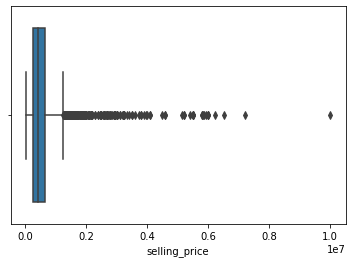

In [257]:
sns.boxplot(dataset.selling_price)

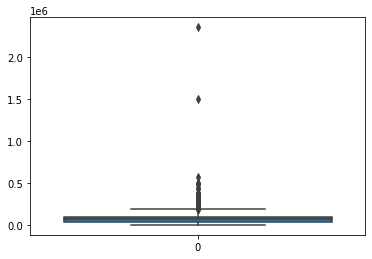

In [258]:
sns.boxplot(data=dataset.km_driven)

In [259]:
dataset=dataset[dataset.km_driven<200000]

In [260]:
dataset.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

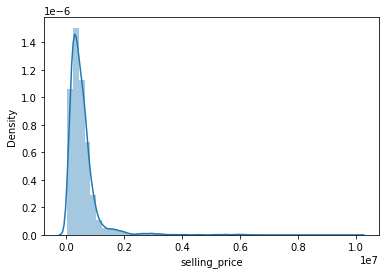

In [261]:
sns.distplot(dataset.selling_price)

as we can see this graph is screwed twowards right will try to remove scwness by taking log of selling price

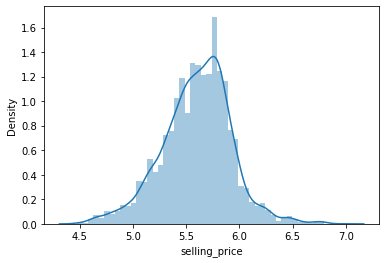

In [262]:
sns.distplot(np.log10(dataset.selling_price))

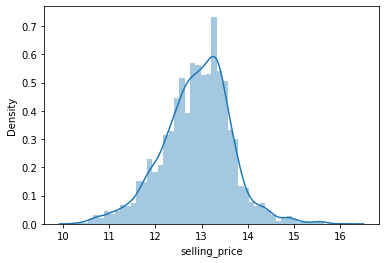

In [263]:
sns.distplot(np.log(dataset.selling_price))

In [264]:
#finding numeric data features from data set
numeric_features=dataset.describe().columns

In [265]:
numeric_features

Index(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'seats'],
      dtype='object')

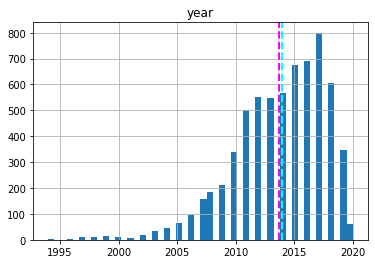

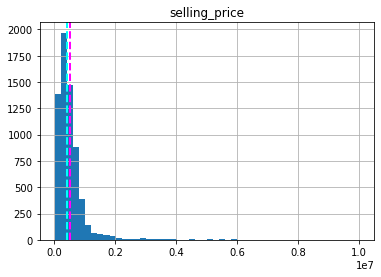

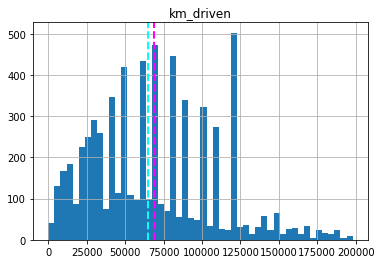

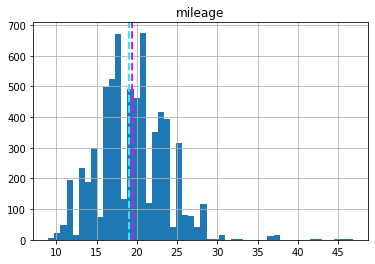

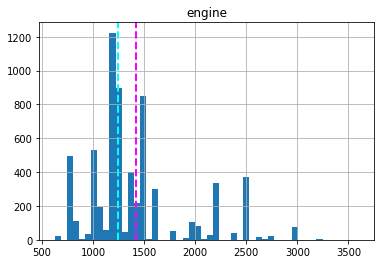

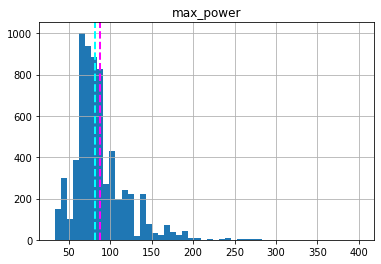

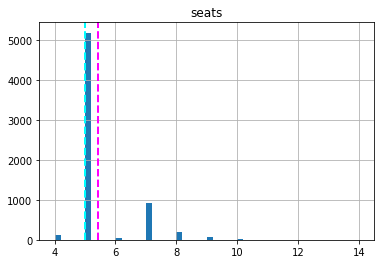

In [266]:
#plotting histogram of all the numeric features of the dataset
for col in numeric_features[:]:
  fig=plt.figure()
  ax=fig.gca()
  feature=dataset[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

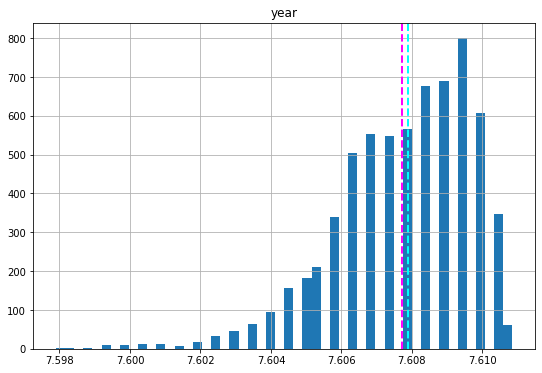

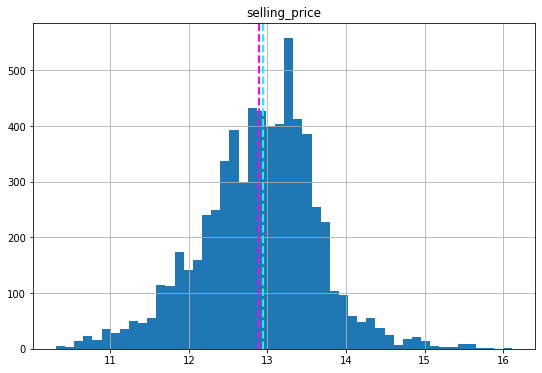

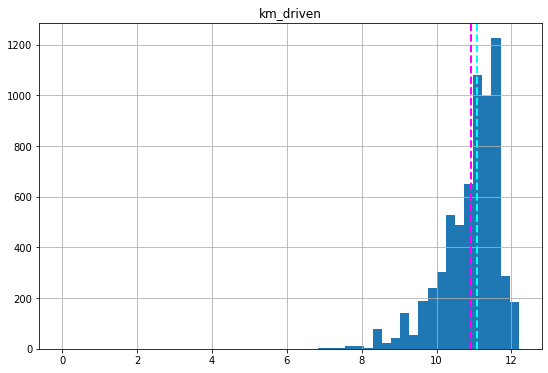

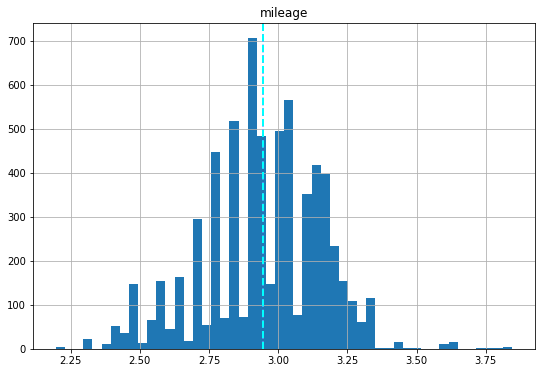

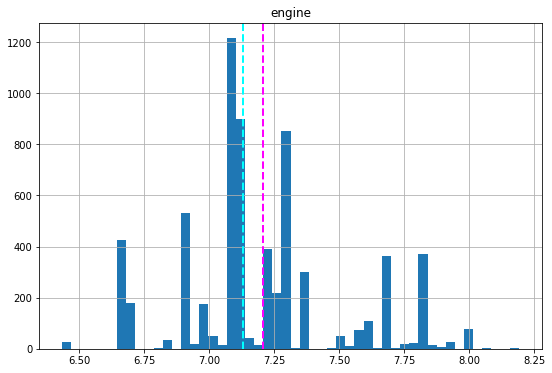

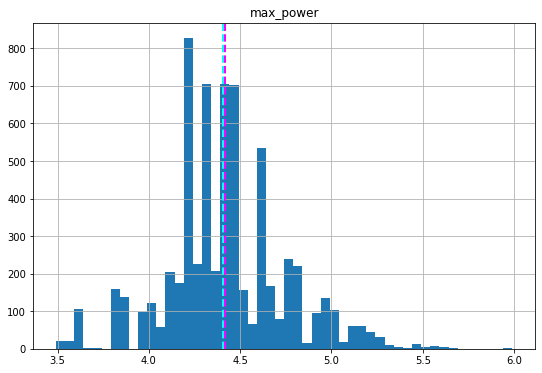

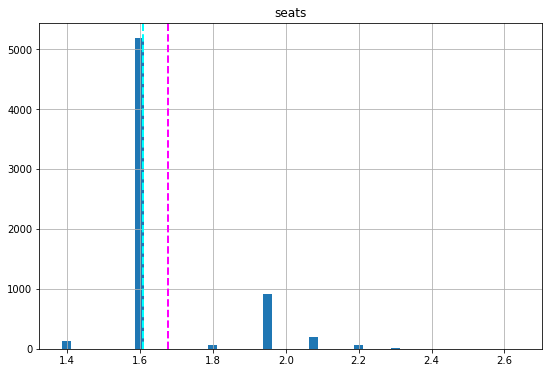

In [267]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log(dataset[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

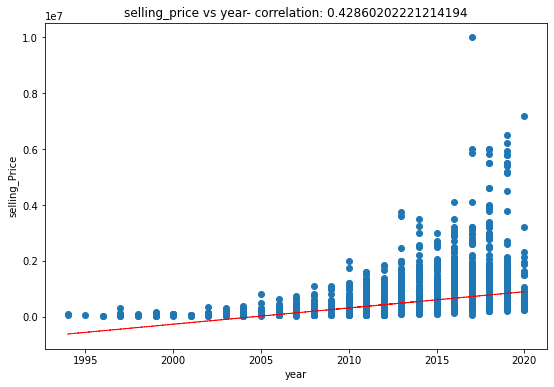

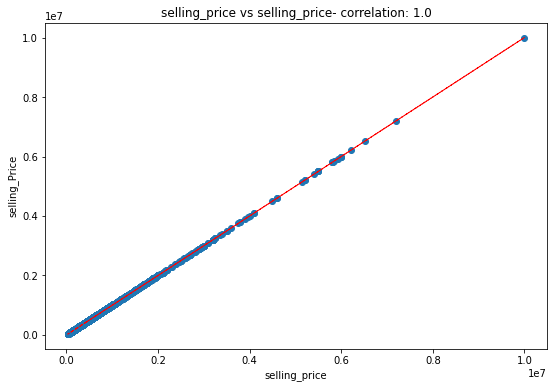

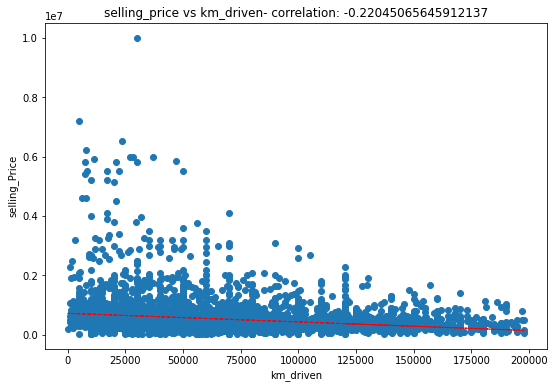

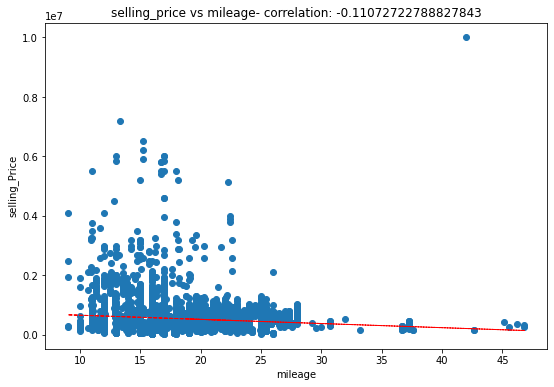

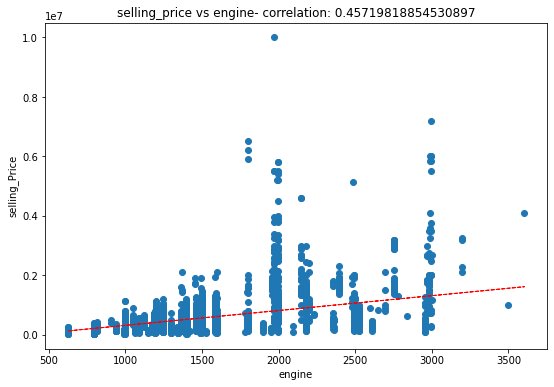

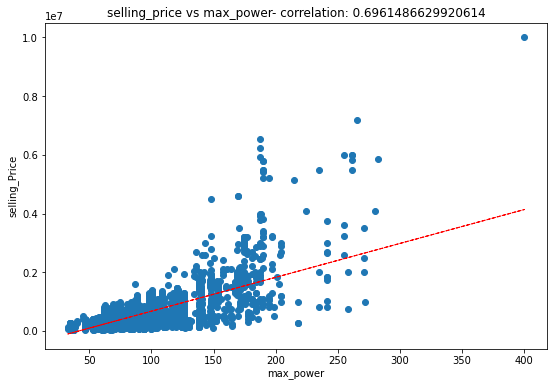

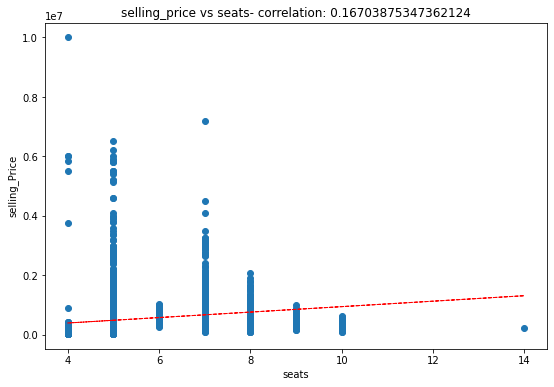

In [268]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['selling_price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('selling_Price')
    ax.set_title('selling_price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['selling_price'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

#**Removing outlier**

In [269]:
dataset=dataset[dataset['year'] >= 2005]
dataset=dataset[dataset['km_driven'] <= 250000]
dataset=dataset[dataset['mileage'] <= 30]
dataset.reset_index(inplace=True)
del dataset['index']

scater plots after removing outliers

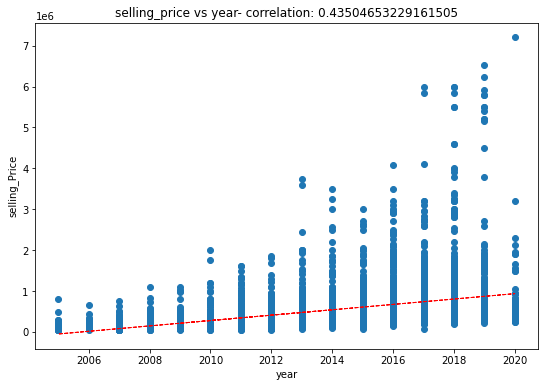

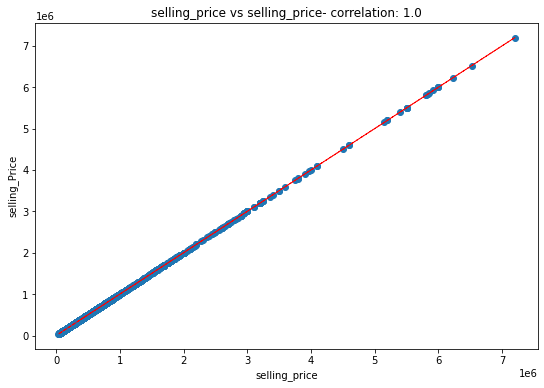

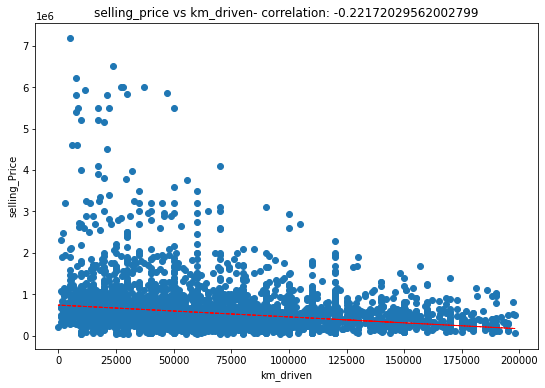

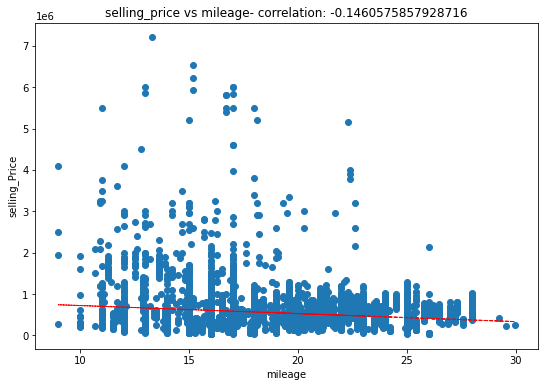

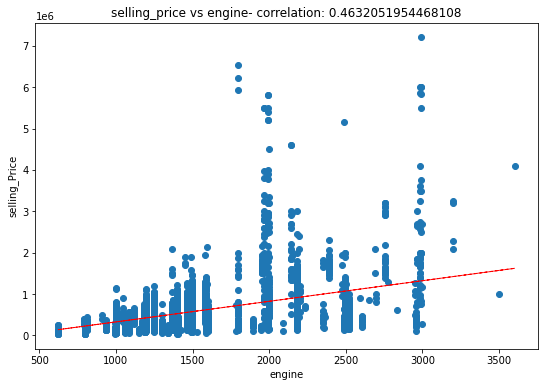

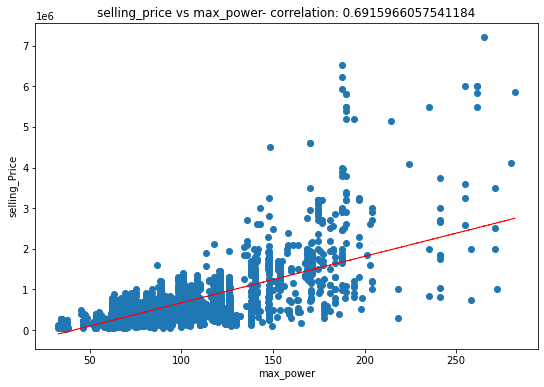

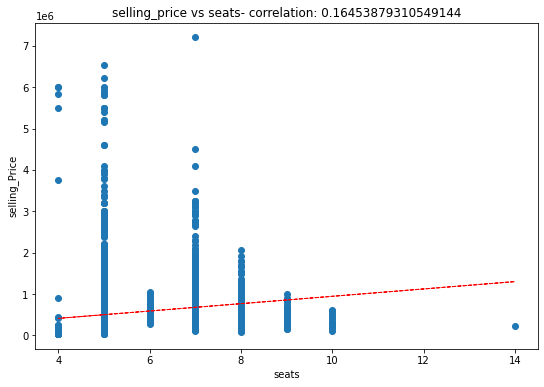

In [270]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['selling_price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('selling_Price')
    ax.set_title('selling_price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['selling_price'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

checking for multicollinearity in our dataset and also find some correlation between numerical data.

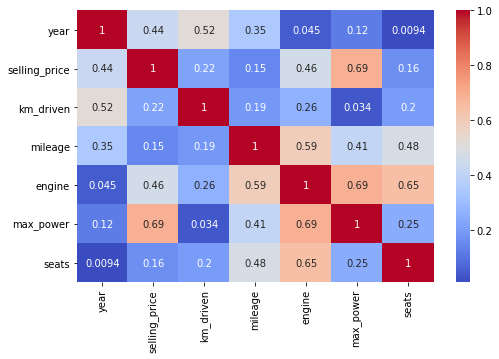

In [271]:
# Correlation
plt.figure(figsize=(8,5))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [272]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [273]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['selling_price','seats','mileage','engine','year'] ]])

,variables,VIF
0,km_driven,3.044805
1,max_power,3.044805


year has lower vif so we drop year

In [274]:
numerical_features=['km_driven','max_power']

In [275]:
dataset['company'] = dataset['name'].str.split(" ", expand=True)[0]
dataset['company'].value_counts()

Maruti           1917
Hyundai          1185
Mahindra          672
Tata              609
Honda             352
Ford              343
Toyota            271
Chevrolet         211
Renault           203
Volkswagen        168
Nissan             72
Skoda              65
Datsun             57
BMW                45
Mercedes-Benz      44
Fiat               38
Audi               32
Jeep               22
Mitsubishi          8
Volvo               8
Jaguar              8
Isuzu               4
Force               4
Kia                 3
MG                  3
Land                2
Ambassador          2
Lexus               1
Name: company, dtype: int64

---
# **Analysis of Categorical Data**

---
In statistics, a categorical variable is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property.

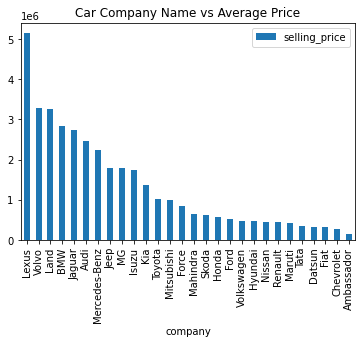

In [276]:
df_autox = pd.DataFrame(dataset.groupby(['company'])['selling_price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [277]:
df_autox.rename(columns={'selling_price':'price_mean'},inplace=True)

In [278]:
dataset = dataset.merge(df_autox,on = 'company',how = 'left')

In [279]:
dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,company,price_mean
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248.0,74.00,5.0,Maruti,414575.073031
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1,1498.0,103.52,5.0,Skoda,611169.184615
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497.0,78.00,5.0,Honda,582943.568182
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.00,5.0,Hyundai,472414.724895
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298.0,88.20,5.0,Maruti,414575.073031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6344,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.0,998.0,67.10,5.0,Maruti,414575.073031
6345,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.5,1396.0,88.73,5.0,Hyundai,472414.724895
6346,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.0,1197.0,82.85,5.0,Hyundai,472414.724895
6347,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.0,1493.0,110.00,5.0,Hyundai,472414.724895


In [280]:
dataset['company_cat'] = dataset['price_mean'].apply(lambda x : 0 if x < 5e5 else (1 if 5e5 <= x < 10e5 else 2))

In [281]:
dataset.company_cat.value_counts()

0    4462
1    1444
2     443
Name: company_cat, dtype: int64

In [282]:
dataset_pr = dataset.copy()

---
# **Feature Engineering**

---

In [283]:
### Data encoding
#label encoding
encoders_nums = {"owner":{"Test Drive Car":0,"First Owner":1,"Second Owner":2,"Third Owner":3,"Fourth & Above Owner":4}
                 }
                 
dataset_pr = dataset_pr.replace(encoders_nums)

In [284]:
dataset_pr.owner.value_counts()

1    4037
2    1751
3     436
4     120
0       5
Name: owner, dtype: int64

In [285]:
dataset_pr.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,company,price_mean,company_cat
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.0,1248.0,74.0,5.0,Maruti,414575.073031,0


In [286]:
# One hot encoding
dataset_pr = pd.get_dummies(dataset_pr, columns=["seller_type", "fuel",'transmission'], prefix=["seller","fsystem",'transmission'])


In [295]:
list(dataset_pr.columns)

['name',
 'year',
 'selling_price',
 'km_driven',
 'owner',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'company',
 'price_mean',
 'company_cat',
 'seller_Dealer',
 'seller_Individual',
 'seller_Trustmark Dealer',
 'fsystem_CNG',
 'fsystem_Diesel',
 'fsystem_LPG',
 'fsystem_Petrol',
 'transmission_Automatic',
 'transmission_Manual']

In [296]:
dataset_pr.company_cat.value_counts()

0    4462
1    1444
2     443
Name: company_cat, dtype: int64

In [346]:
features=['seller_Individual',
 'seller_Trustmark Dealer',
 'fsystem_CNG',
 'fsystem_Diesel',
 'fsystem_LPG',
 'fsystem_Petrol',
 'transmission_Automatic',
 'transmission_Manual',
 'km_driven','max_power','year']

In [298]:
numerical_features

['km_driven', 'max_power']

In [299]:
features

['seller_Individual',
 'seller_Trustmark Dealer',
 'fsystem_CNG',
 'fsystem_Diesel',
 'fsystem_LPG',
 'fsystem_Petrol',
 'transmission_Automatic',
 'transmission_Manual',
 'km_driven',
 'max_power']

In [300]:
dataset_pr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6349 entries, 0 to 6348
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     6349 non-null   object 
 1   year                     6349 non-null   int64  
 2   selling_price            6349 non-null   int64  
 3   km_driven                6349 non-null   int64  
 4   owner                    6349 non-null   int64  
 5   mileage                  6349 non-null   float64
 6   engine                   6349 non-null   float64
 7   max_power                6349 non-null   float64
 8   seats                    6349 non-null   float64
 9   company                  6349 non-null   object 
 10  price_mean               6349 non-null   float64
 11  company_cat              6349 non-null   int64  
 12  seller_Dealer            6349 non-null   uint8  
 13  seller_Individual        6349 non-null   uint8  
 14  seller_Trustmark Dealer 

---
#**Implimentation of Linear regretion**
---

###zscore

In [347]:
#ZSCORE
from scipy.stats import zscore
X = dataset_pr[features].apply(zscore)
y = np.log10(dataset_pr['selling_price'])

In [348]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(5079, 11)
(1270, 11)


###minmax

In [308]:
X = dataset_pr[features]
y = np.log10(dataset_pr['selling_price'])

In [309]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(5079, 10)
(1270, 10)


In [310]:
# MINMAX SCALER
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###std scalar 

In [ ]:
X = dataset_pr[features]
y = np.log10(dataset_pr['selling_price'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

In [ ]:
#STANDARD SCALER
from sklearn.preprocessing import StandardScaler
X = dataset_pr[features]
y = np.log10(dataset_pr['selling_price'])
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

### linear reg

In [349]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [350]:
reg.score(X_train, y_train)

0.8308950585430037

In [351]:
features

['seller_Individual',
 'seller_Trustmark Dealer',
 'fsystem_CNG',
 'fsystem_Diesel',
 'fsystem_LPG',
 'fsystem_Petrol',
 'transmission_Automatic',
 'transmission_Manual',
 'km_driven',
 'max_power',
 'year']

In [352]:
reg.coef_

array([-1.16352495e-02,  9.60706394e-04,  2.18017190e+10,  3.26734238e+11,
        4.19543371e+10,  3.26363116e+11, -1.38233409e+12, -1.38233409e+12,
       -9.81122146e-03,  1.55714260e-01,  1.82423763e-01])

In [353]:
y_pred = reg.predict(X_test)

In [355]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 52872562561.31778
RMSE : 229940.34565799404
R2 : 0.7980012850305677
Adjusted R2 :  0.7962350005594518


In [ ]:
plt.figure(figsize=(40,10))
plt.plot((10**y_pred))
plt.plot(np.array((10**y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

### laso regularization

In [392]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha= 1e-16 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=1e-16, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [393]:
lasso.score(X_train, y_train)

0.8309354343227237

In [359]:
lasso.coef_

array([-1.20920201e-02,  9.24715871e-04, -2.18711714e-03,  5.56746577e-02,
        3.88474486e-03, -6.44506044e-04,  1.47423291e-02, -8.70574125e-17,
       -9.84942978e-03,  1.55512513e-01,  1.82328659e-01])

In [394]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 52872562561.31778
RMSE : 229940.34565799404
R2 : 0.7980012850305677
Adjusted R2 :  0.7962350005594518


In [387]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014,1e-16,1e-17]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014, 1e-16, 1e-17]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [388]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-16}

Using  {'alpha': 1e-16}  the negative mean squared error is:  -0.016257418718445927


In [389]:
y_pred_lasso = lasso_regressor.predict(X_test)

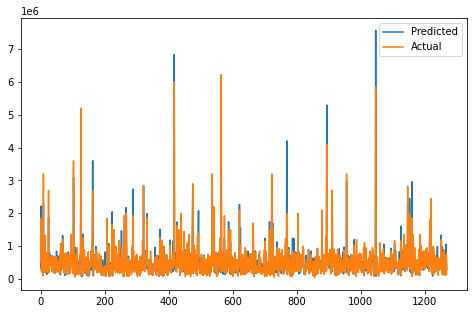

In [390]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [391]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 52307879162.306435
RMSE : 228709.15845743133
R2 : 0.800158648234452
Adjusted R2 :  0.7984112278295069


### ridge regularization

In [368]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 0.5, 1.5, 1.6, 1.7, 1.8, 1.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [369]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -0.016255417259585653


In [370]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [371]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 52115252511.76103
RMSE : 228287.65299893255
R2 : 0.8008945750364471
Adjusted R2 :  0.7991535896035384


###elastic net regularization

In [372]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [373]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [374]:
elasticnet.score(X_train, y_train)

0.7533682966641004

In [375]:
y_pred_en = elasticnet.predict(X_test)


In [376]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 93950952280.36916
RMSE : 306514.1958871875
R2 : 0.6410620043471555
Adjusted R2 :  0.6379234368175997


In [377]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [378]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05, 'l1_ratio': 0.4}

Using  {'alpha': 1e-05, 'l1_ratio': 0.4}  the negative mean squared error is:  -0.016257417777527008


In [379]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [380]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 52305652133.49236
RMSE : 228704.28971379693
R2 : 0.800167156559694
Adjusted R2 :  0.7984198105518694


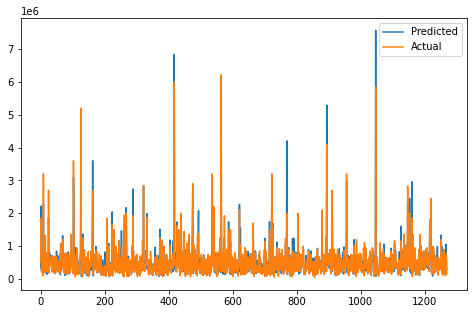

In [381]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()